**Installing Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import pickle

**Importing the Dataset**

In [7]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Data Visualization**

Univariate Analysis

/tmp/ipykernel_3146/1289758398.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'],color='r')


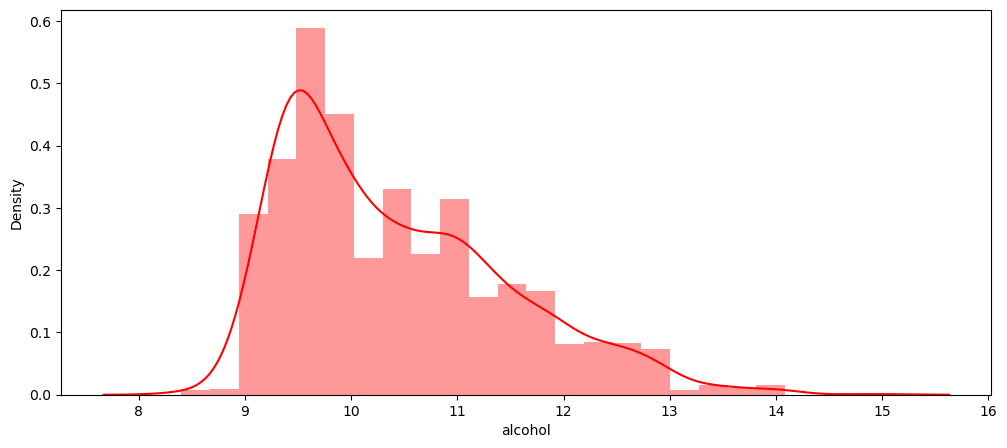

In [13]:
# Checking the distribution (normal or skewed)

plt.figure(figsize=(12,5))
sns.distplot(data['alcohol'],color='r')
plt.show()

In [14]:
df_cat = data.select_dtypes(include='object')
df_cat.head()

""
0
1
2
3
4


In [15]:
# Visualizing the count of categorical variable.

plt.figure(figsize=(20,5))
for i,j in enumerate(df_cat):
    plt.subplot(1,4,i+1)
    sns.countplot(data[j])   

<Figure size 2000x500 with 0 Axes>

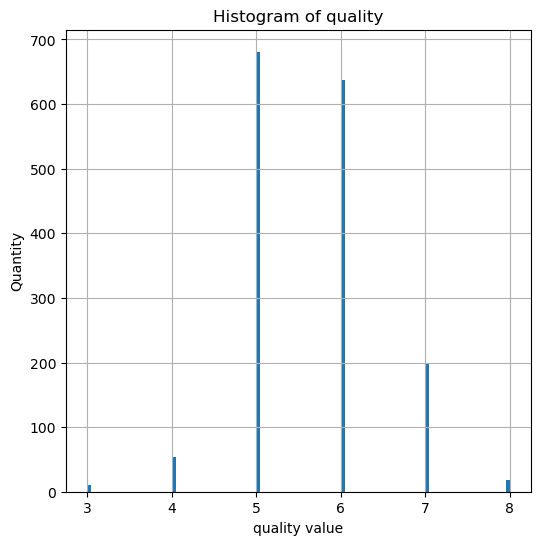

In [16]:
axarr = data.hist(column=['quality'], bins=100, figsize=(6, 6))
ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quantity")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")
plt.show()

**Bivariate Analysis**

In [17]:
# Visualizing the relation between quality and type

plt.figure(figsize=(10,5))
sns.countplot(data['quality'],hue=data['type'])
plt.legend(loc='upper right')


KeyError: 'type'

<Figure size 1000x500 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


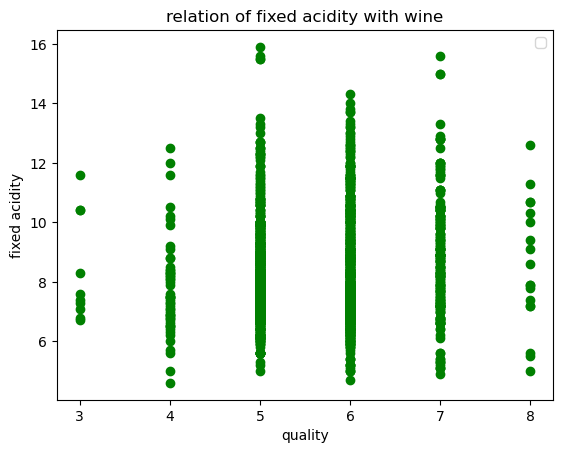

In [18]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


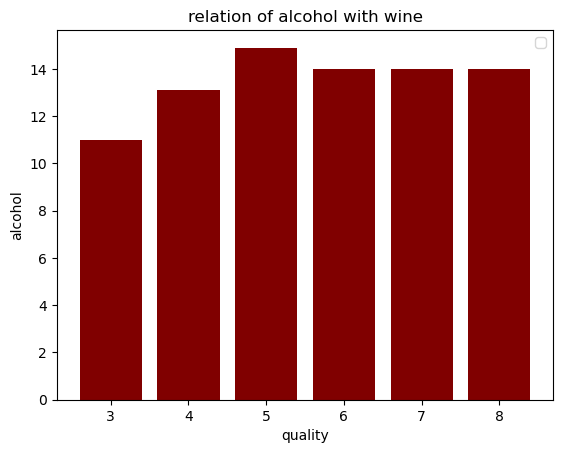

In [19]:
# checking the variation of fixed acidity in the different qualities of wine

plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

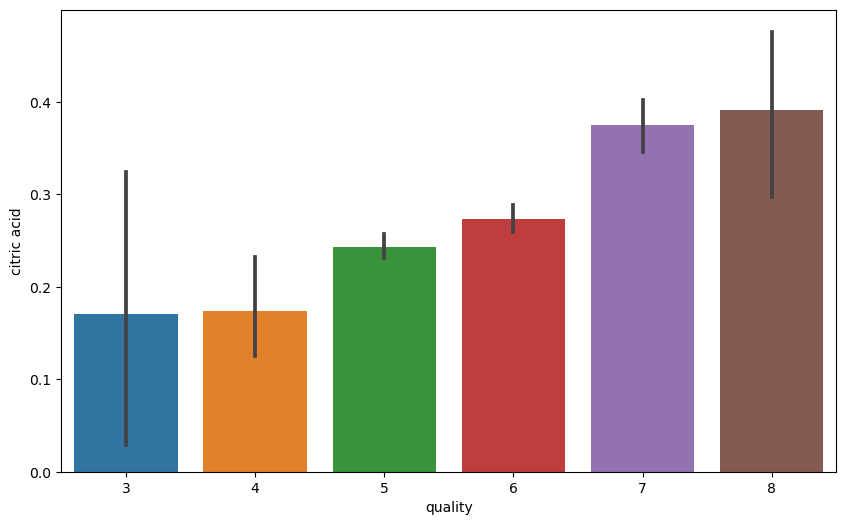

In [20]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)



<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

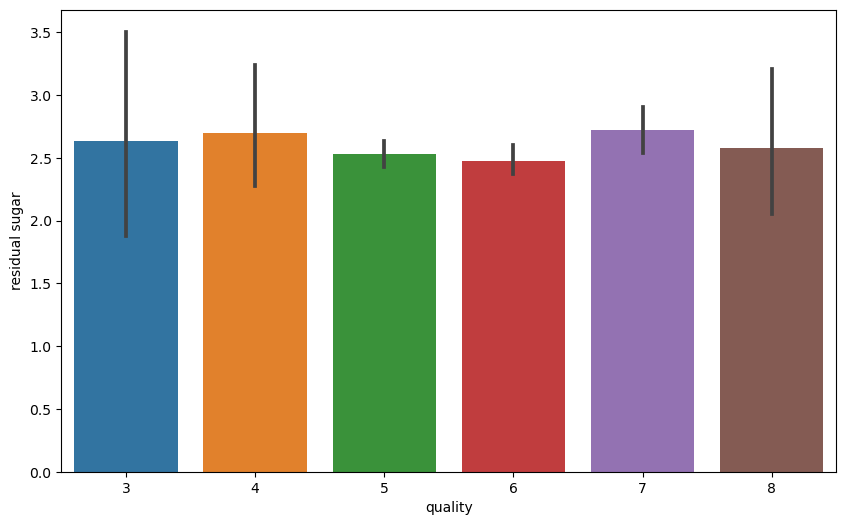

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

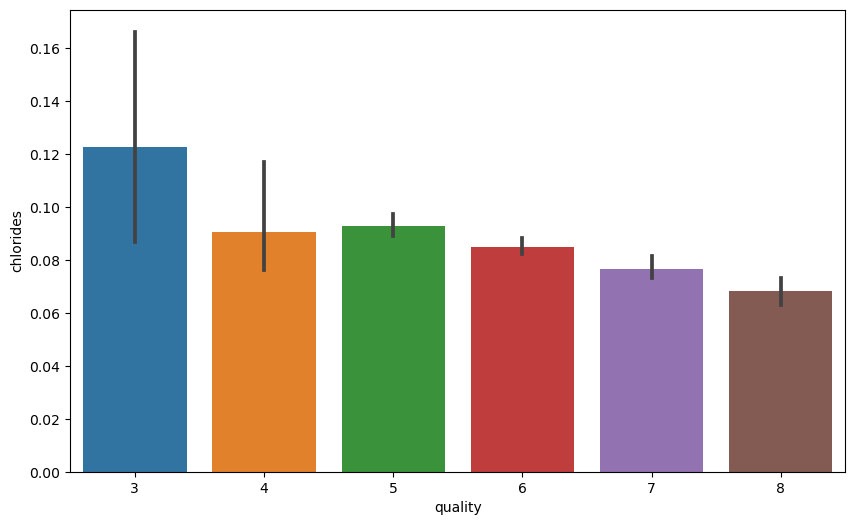

In [22]:
#Composition of chloride also go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

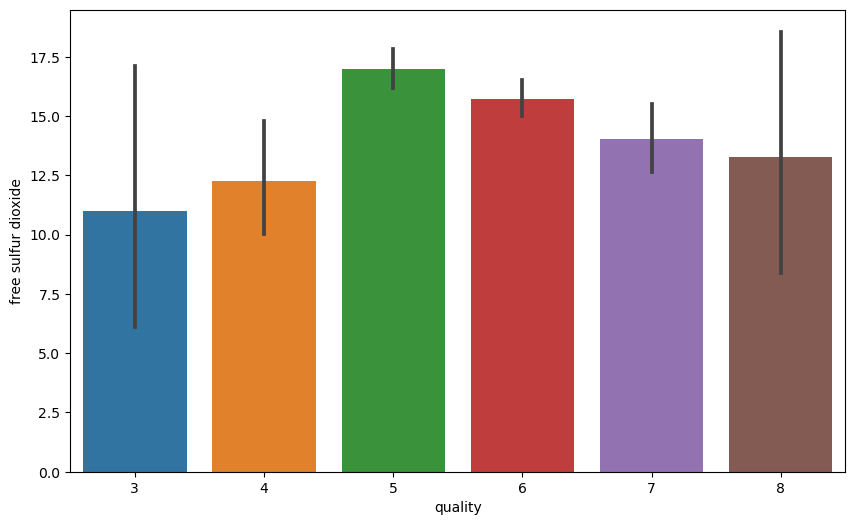

In [23]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)



<AxesSubplot:xlabel='quality', ylabel='sulphates'>

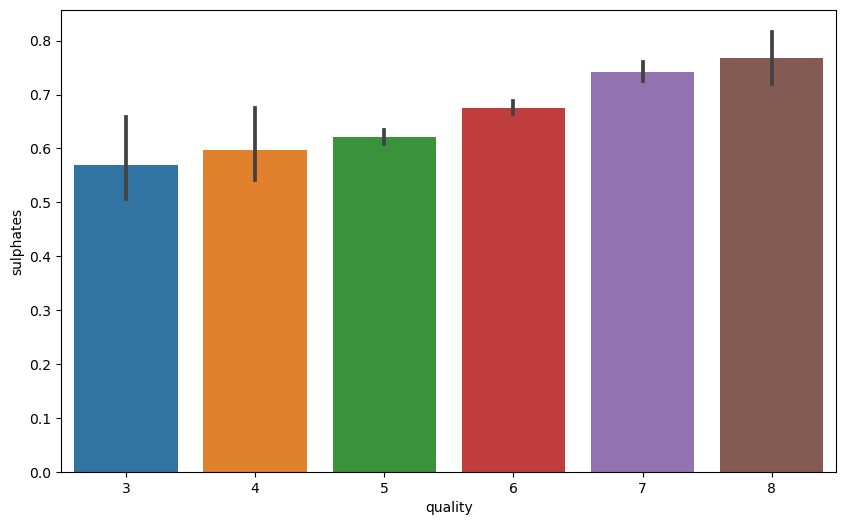

In [24]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

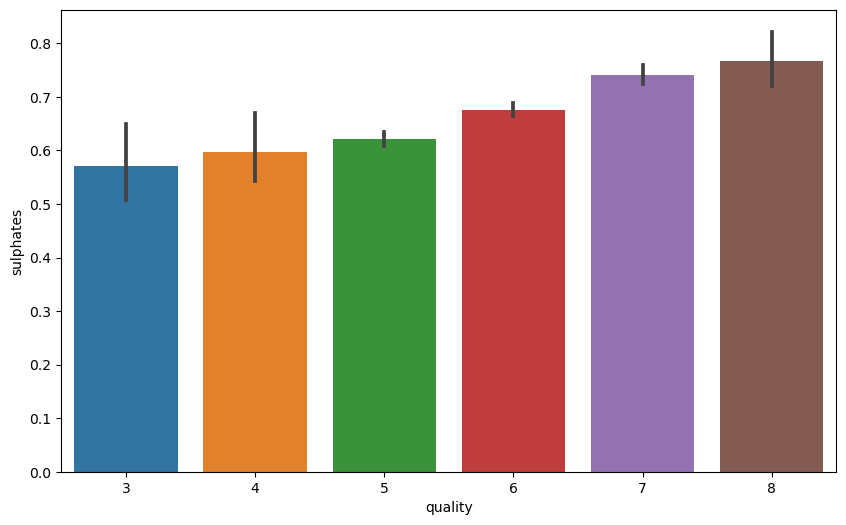

In [25]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

As we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

/tmp/ipykernel_3146/1055928178.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

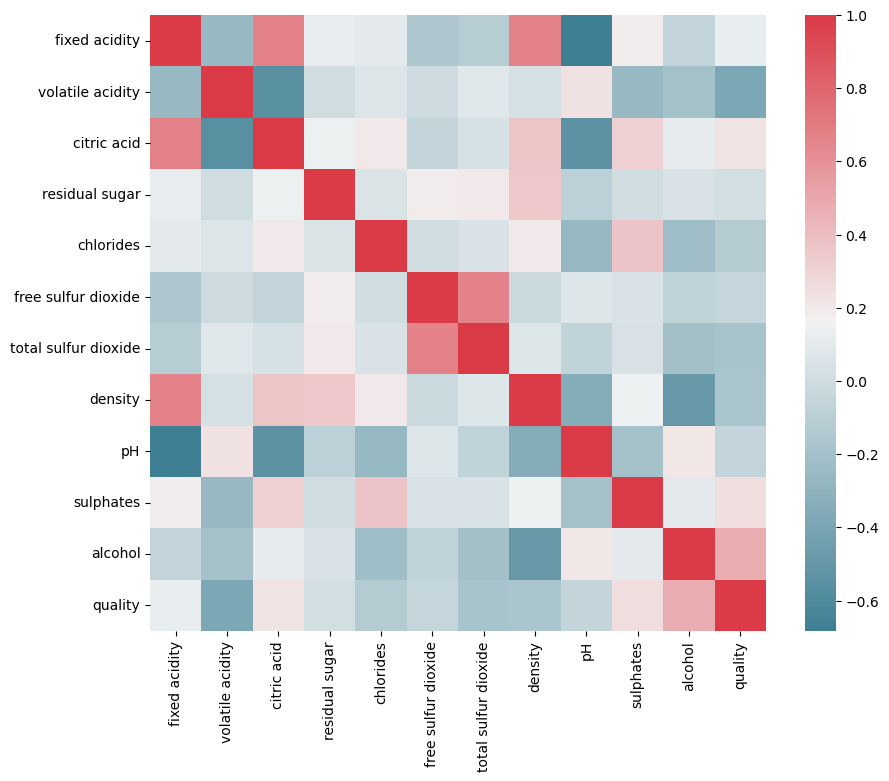

In [26]:

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

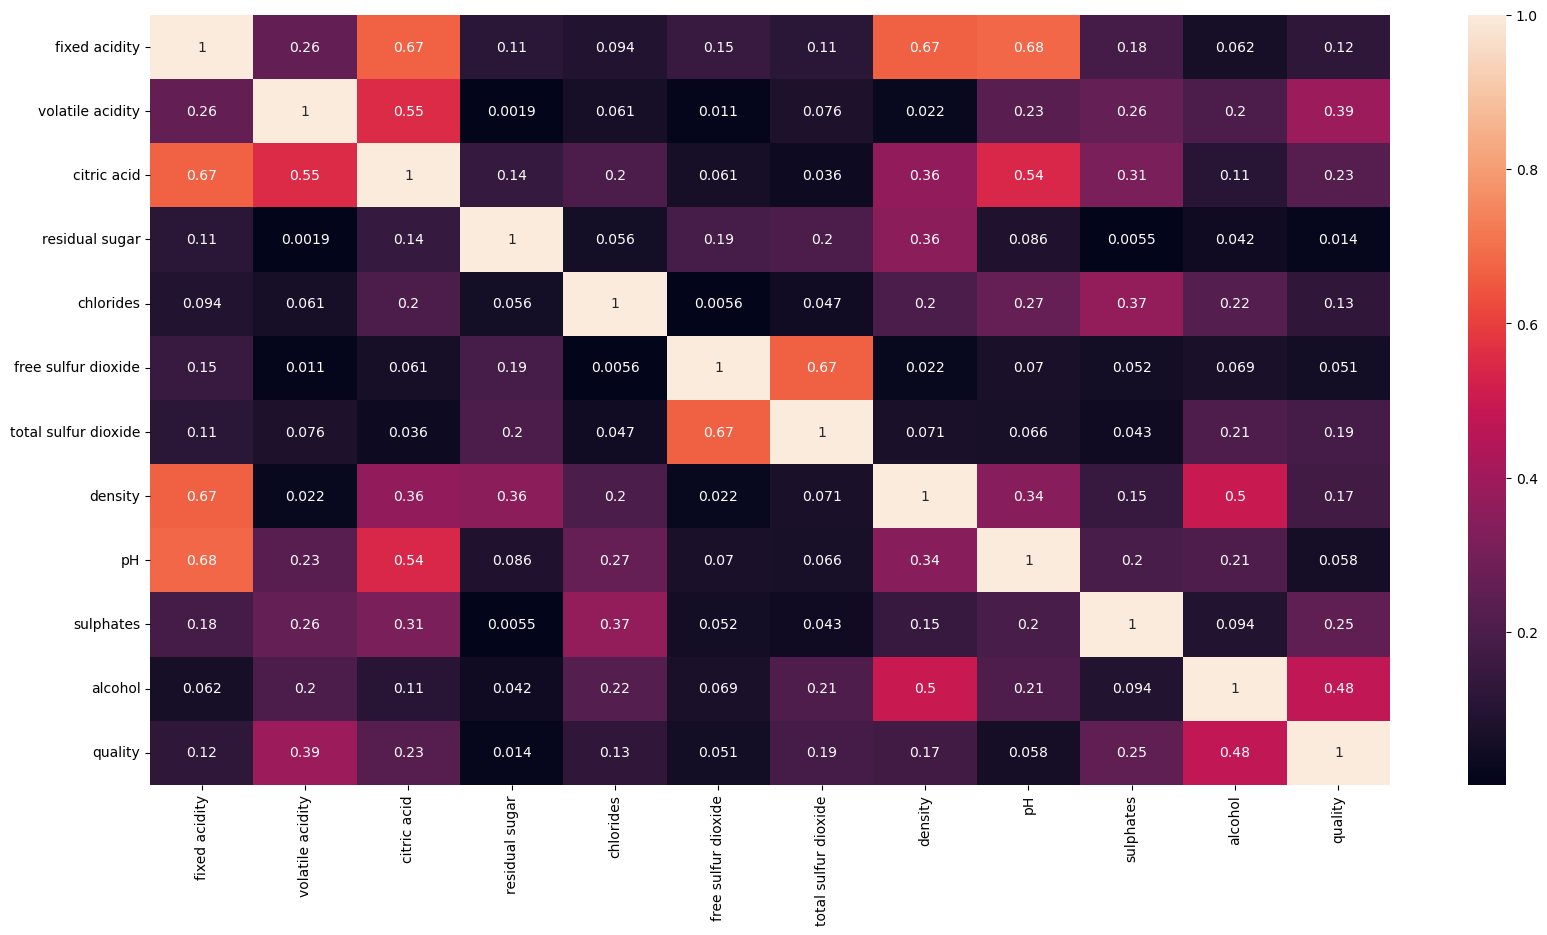

In [27]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr().abs(), annot = True)
plt.show()

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other.
For Example, 
# The strongly correlated items are :

1.fixed acidity and citric acid.
2.free sulphur dioxide and total sulphor dioxide.
3.fixed acidity and density.
4. alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

# The weekly correlated items are :

1.citric acid and volatile acidity.
2.fixed acidity and ph.
3.density and alcohol.

These are some relations which do not depend on each other at all.

In [28]:
#Descriptive Analysis
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Data pre-processing**

In [29]:
# Removing Unnecassary columns from the dataset
# As we saw that volatile acidity, total sulphor dioxide, chlorides, density are very less related to the dependent variable 
#   quality so even if we remove these columns the accuracy won't be affected that much.

data = data.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides', 'density'], axis = 1)

# checking the shape of the dataset
print(data.shape)

(1599, 8)


In [30]:
data.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [31]:
# converting the response variables(3-7) as binary response variables that is either good or bad
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [32]:
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [33]:
data['type'].value_counts()

KeyError: 'type'

In [34]:
data.isnull().any()

fixed acidity          False
citric acid            False
residual sugar         False
free sulfur dioxide    False
pH                     False
sulphates              False
alcohol                False
quality                False
dtype: bool

In [35]:
data.isnull().sum()

fixed acidity          0
citric acid            0
residual sugar         0
free sulfur dioxide    0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [36]:
data["fixed acidity"].fillna(data["fixed acidity"].mean(),inplace = True)
data["sulphates"].fillna(data["sulphates"].mean(),inplace = True)
data["pH"].fillna(data["pH"].mean(),inplace = True)
data["residual sugar"].fillna(data["residual sugar"].mean(),inplace = True)
data["citric acid"].fillna(data["citric acid"].mean(),inplace = True)
data["quality"].fillna(data["quality"].mode()[0],inplace = True)

In [37]:
data.isnull().any()

fixed acidity          False
citric acid            False
residual sugar         False
free sulfur dioxide    False
pH                     False
sulphates              False
alcohol                False
quality                False
dtype: bool

In [38]:
#converting categorical data to numerical data
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['type'] = le.fit_transform(data['type'])

KeyError: 'type'

<AxesSubplot:ylabel='count'>

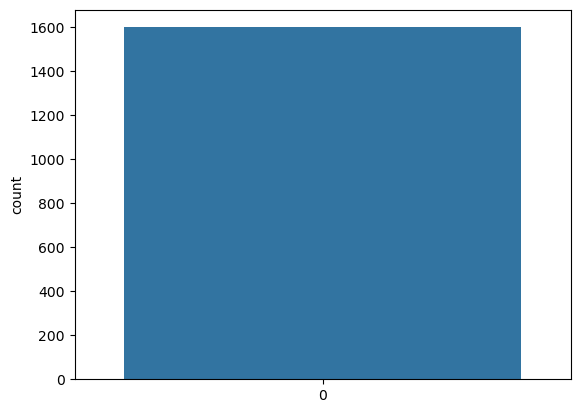

In [39]:
sns.countplot(data['quality'])

In [40]:
# dividing the dataset into dependent and independent variables
x = data.iloc[:,:8]
y = data.iloc[:,8:9]
# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 8)
(1599, 0)


In [41]:
# dividing the dataset in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 8)
(1199, 0)
(400, 8)
(400, 0)


In [42]:
# standard scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


**Modelling**

**Logistic Regression**

In [43]:
# creating the model
model = LogisticRegression()
# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))


ValueError: at least one array or dtype is required

**Stochastic Gradient Descent Classifier**

In [44]:
# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))

ValueError: at least one array or dtype is required

**Support Vector Machine**

In [ ]:
# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))


In [ ]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
#grid_svc.fit(x_train, y_train)

In [ ]:
#grid_svc.best_params_

In [ ]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

**Decision Forest**

In [ ]:
# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
#Now lets try to do some evaluation for decision tree model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()


**Random Forest**

In [ ]:
# creating the model
rfmodel = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
rfmodel.fit(x_train, y_train)

# predicting the results for the test set
y_pred = rfmodel.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", rfmodel.score(x_train, y_train))
print("Testing accuracy :", rfmodel.score(x_test, y_test))

In [ ]:
# Random Forest classification report
classification_report(y_test, y_pred)

In [ ]:
# Random Forest confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
#Random Forest Cross validation score
model_eval = cross_val_score(estimator = rfmodel, X = x_train, y = y_train, cv = 5)
model_eval.mean()

In [ ]:
def logisticRegression(x_train, x_test, y_train, y_test):
    # creating the model
    model = LogisticRegression()
    # feeding the training set into the model
    model.fit(x_train, y_train)
    # predicting the results for the test set
    y_pred = model.predict(x_test)
    # calculating the training and testing accuracies
    print('***logisticRegression***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    # classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test, y_pred))

In [ ]:
def SGD(x_train, x_test, y_train, y_test):
    # creating the model
    model = SGDClassifier(penalty=None)
    # feeding the training model into the model
    model.fit(x_train, y_train)
    # predicting the values for the test set
    y_pred = model.predict(x_test)
    print('***Stochastic Gradient Descent Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    # classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test, y_pred))
    

In [ ]:
def SVClassifier(x_train, x_test, y_train, y_test):
    # creating the model
    model = SVC()
    # feeding the training set into the model
    model.fit(x_train, y_train)
    # predicting the results for the test set
    y_pred = model.predict(x_test)
    # calculating the training and testing accuracies
    print('***Support Vector Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    # classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test, y_pred))

In [ ]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print("Training accuracy :", dt.score(x_train, y_train))
    print("Testing accuracy :", dt.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [ ]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print("Training accuracy :", rf.score(x_train, y_train))
    print("Testing accuracy :", rf.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [ ]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print("Training accuracy :", xg.score(x_train, y_train))
    print("Testing accuracy :", xg.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [ ]:
def compareModel(x_train, x_test, y_train, y_test):
    logisticRegression(x_train, x_test, y_train, y_test)
    print('-'*100)
    SGD(x_train, x_test, y_train, y_test)
    print('-'*100)
    SVClassifier(x_train, x_test, y_train, y_test)
    print('-'*100)
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)
    print('-'*100)

In [ ]:
compareModel(x_train, x_test, y_train, y_test)

In [ ]:
pickle.dump(rfmodel,open('wineQuality_new.pkl','wb'))